In [12]:
#!pip install -U scikit-learn scipy matplotlib
#!pip install seaborn
#!pip install matplotlib
#!pip install openpyxl

In [13]:
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np
import time

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [15]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Chrome/113.0.5672.93"})
    soup = bts(result.text, "html.parser")
    return soup

In [16]:
html = getAndParseURL("https://www.imdb.com/chart/top/?ref_=nv_mv_250")

In [17]:
html


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top/" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top/" property="og:url">
<script>
    if (typeof uet == 'function') {
      uet("bb", "Lo

In [18]:
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# Bilgisayarımızda chromedriver.exe dosyasını kaydettiğimiz dizin
chromedriver = "C:/Users/ali_t/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [19]:
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.imdb.com/chart/top/?ref_=nv_mv_250")

In [20]:
driver.page_source

'<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml" class=" scriptsOn"><head><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js" crossorigin="anonymous"></script>\n        \n<script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>\n<script type="text/javascript">\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}

In [21]:
soup = bts(driver.page_source , 'html.parser')

In [22]:
soup

<html class="scriptsOn" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js"></script>
<script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    

In [23]:
finder=soup.findAll('td',{"class":"titleColumn"})
finder

[<td class="titleColumn">
       1.
       <a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&amp;pf_rd_r=BG2BM9HDZCEMBD10BXN1&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">Esaretin Bedeli</a>
 <span class="secondaryInfo">(1994)</span>
 </td>,
 <td class="titleColumn">
       2.
       <a href="/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&amp;pf_rd_r=BG2BM9HDZCEMBD10BXN1&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_2" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">Baba</a>
 <span class="secondaryInfo">(1972)</span>
 </td>,
 <td class="titleColumn">
       3.
       <a href="/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&amp;pf_rd_r=BG2BM9HDZCEMBD10BXN1&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_t

In [24]:
movies = []
for movie in soup.find("tbody",{"class":"lister-list"}).findAll("td",{"class":"titleColumn"}):
    movies.append(movie.a.get("href"))
movies

['/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1',
 '/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_2',
 '/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_3',
 '/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_4',
 '/title/tt0050083/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_5',
 '/title/tt0108052/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD

In [25]:
movies = []
for movie in soup.find("tbody",{"class":"lister-list"}).findAll("td",{"class":"titleColumn"}):
    movies.append("https://www.imdb.com/" + movie.a.get("href"))
movies

['https://www.imdb.com//title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1',
 'https://www.imdb.com//title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_2',
 'https://www.imdb.com//title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_3',
 'https://www.imdb.com//title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_4',
 'https://www.imdb.com//title/tt0050083/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=BG2BM9HDZCEMBD10BXN1&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_5',
 'htt

In [26]:
html = getAndParseURL("https://www.imdb.com//title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=CFPT2RCPPXT19B2FYSQ7&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1")
#Film name
html.find("span",{"class":"sc-afe43def-1 fDTGTb"}).text.strip()

'The Shawshank Redemption'

In [27]:
#Film point
html.find("span", {"class":"sc-bde20123-1 iZlgcd"}).text.strip()

'9.3'

In [28]:
#Film popularity
html.find("div", {"data-testid":"hero-rating-bar__popularity__score"}).text.strip()

'43'

In [29]:
#FILM Yapım yılı
html.find("ul", {"class":"ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt"}).find("a",{"class":"ipc-link ipc-link--baseAlt ipc-link--inherit-color"}).text.strip()

'1994'

In [30]:
#Director
html.find("a",{"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text.strip()

'Frank Darabont'

In [31]:
#Film türü
html.find("span",{"class":"ipc-chip__text"}).text.strip()

'Drama'

In [32]:
#İnceleme sayısı
html.find("span",{"class":"score"}).text.strip()

'10.8K'

In [33]:
#mata score
html.find("span",{"class":"score-meta"}).text.strip()

'82'

In [34]:
#PRICE
html.find('ul',{'class':'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-6d4f3f8c-0 VdkJY ipc-metadata-list--base'}).find(text=re.compile("Gross worldwide")).findNext().text.replace(",","")

'$28884504'

In [35]:
features =[]
for movie in movies:
    html = getAndParseURL(movie)
    try:
        NAME = html.find("span",{"class":"sc-afe43def-1 fDTGTb"}).text.strip() #FILM NAME
    except:
        NAME = np.nan
    try: 
        IMDB = html.find("span", {"class":"sc-bde20123-1 iZlgcd"}).text.replace(',' , '.') #IMDB POINT
    except:
        IMDB =np.nan
    try:
        FILM_POPULARITY = html.find("div", {"data-testid":"hero-rating-bar__popularity__score"}).text.strip().replace(",","")  #FILM POPULARITY
    except:
        FILM_POPULARITY = np.nan
    try: 
        CONSTRUCTION = html.find("ul", {"class":"ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt"}).find("a",{"class":"ipc-link ipc-link--baseAlt ipc-link--inherit-color"}).text.strip() #MOVIE DATE 
    except: 
        CONSTRUCTION = np.nan
    try: 
        DIRECTOR = html.find("a",{"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text.strip() #DIRECTOR
    except: 
        DIRECTOR = np.nan
    try:
        GENRE = html.find("span",{"class":"ipc-chip__text"}).text.strip() #GENRE
    except:
        GENRE = np.nan
    try: 
        REVIEW= html.find("span",{"class":"score"}).text.strip().replace("K","00").replace(".","") # REVIEW
    except: 
        REVIEW = np.nan
    try:
        MATA_SCORE = html.find("span",{"class":"score-meta"}).text.strip() #MATA SCORE
    except:
        MATA_SCORE = np.nan
    try:
        PRICE = html.find('ul',{'class':'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-6d4f3f8c-0 VdkJY ipc-metadata-list--base'}).find(text=re.compile("Gross worldwide")).findNext().text.replace(",","")
    except:
        PRICE = np.nan

    features.append([NAME,IMDB,FILM_POPULARITY,CONSTRUCTION,DIRECTOR,GENRE,REVIEW,MATA_SCORE,PRICE])
    time.sleep(1)

df_columns = ['NAME','IMDB POINT','FILM POPULARITY','YEAR OF CONSTRUCTION','DIRECTOR','FILM GENRE','FILM REVIEW','MATA SCORE','PRICE']

df = pd.DataFrame.from_records(features, columns=df_columns)
    

In [ ]:
df

,NAME,IMDB POINT,FILM POPULARITY,YEAR OF CONSTRUCTION,DIRECTOR,FILM GENRE,FILM REVIEW,MATA SCORE,PRICE
0,The Shawshank Redemption,9.3,43,1994,Frank Darabont,Drama,10800,82,$28884504
1,The Godfather,9.2,62,1972,Francis Ford Coppola,Crime,5300,100,$250341816
2,The Dark Knight,9.0,102,2008,Christopher Nolan,Action,8500,84,$1006234167
3,The Godfather Part II,9.0,233,1974,Francis Ford Coppola,Crime,1300,90,$47961919
4,12 Angry Men,9.0,303,1957,Sidney Lumet,Crime,200,97,$955
...,...,...,...,...,...,...,...,...,...
245,Life of Brian,8.0,1648,1979,Terry Jones,Comedy,459,77,$20745728
246,The Iron Giant,8.1,2194,1999,Brad Bird,Animation,635,85,$23335817
247,The Help,8.1,361,2011,Tate Taylor,Drama,664,62,$216639112
248,Aladdin,8.0,1295,1992,Ron Clements,Animation,396,86,$504050219


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NAME                  250 non-null    object
 1   IMDB POINT            250 non-null    object
 2   FILM POPULARITY       231 non-null    object
 3   YEAR OF CONSTRUCTION  250 non-null    object
 4   DIRECTOR              250 non-null    object
 5   FILM GENRE            250 non-null    object
 6   FILM REVIEW           250 non-null    object
 7   MATA SCORE            233 non-null    object
 8   PRICE                 243 non-null    object
dtypes: object(9)
memory usage: 17.7+ KB


In [ ]:
df["FILM POPULARITY"].sort_values()
df["FILM POPULARITY"].fillna(0,inplace=True)

In [ ]:
df["MATA SCORE"].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

NAME                    0
IMDB POINT              0
FILM POPULARITY         0
YEAR OF CONSTRUCTION    0
DIRECTOR                0
FILM GENRE              0
FILM REVIEW             0
MATA SCORE              0
PRICE                   7
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['IMDB POINT'].astype(float)

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
245    8.0
246    8.1
247    8.1
248    8.0
249    8.0
Name: IMDB POINT, Length: 243, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NAME                  243 non-null    object
 1   IMDB POINT            243 non-null    object
 2   FILM POPULARITY       243 non-null    object
 3   YEAR OF CONSTRUCTION  243 non-null    object
 4   DIRECTOR              243 non-null    object
 5   FILM GENRE            243 non-null    object
 6   FILM REVIEW           243 non-null    object
 7   MATA SCORE            243 non-null    object
 8   PRICE                 243 non-null    object
dtypes: object(9)
memory usage: 19.0+ KB


In [ ]:
df_price_usd = df[df["PRICE"].str.startswith("$")]
df_price_usd["PRICE"] = df_price_usd["PRICE"].str.replace("$","") # $ sembolünü kaldıralım
df_price_usd["PRICE"] = df_price_usd["PRICE"].str.replace(".","") # noktaları kaldıralım
pd.set_option('display.float_format', '{:.2f}'.format) #Bilimsem gosterimi degistirelim
df_price_usd["PRICE"] = df_price_usd["PRICE"].astype(float) #price usd olanlari secelim
df_price_usd["IMDB POINT"] = df_price_usd["IMDB POINT"].astype(float) #puani float yapalim
df_price_usd["MATA SCORE"] = df_price_usd["MATA SCORE"].astype(int) #meta score u int yapalim
df_price_usd["FILM REVIEW"] = df_price_usd["FILM REVIEW"].astype(int) #Film incelemelerini int yapalim
df_price_usd["YEAR OF CONSTRUCTION"] = df_price_usd["YEAR OF CONSTRUCTION"].astype(int) #Yapim yilini int yapalim
df_price_usd["FILM POPULARITY"] =df_price_usd["FILM POPULARITY"].astype(int) #pupulerite puanini int yapalim
df_price_usd

,NAME,IMDB POINT,FILM POPULARITY,YEAR OF CONSTRUCTION,DIRECTOR,FILM GENRE,FILM REVIEW,MATA SCORE,PRICE
0,The Shawshank Redemption,9.30,43,1994,Frank Darabont,Drama,10800,82,28884504.00
1,The Godfather,9.20,62,1972,Francis Ford Coppola,Crime,5300,100,250341816.00
2,The Dark Knight,9.00,102,2008,Christopher Nolan,Action,8500,84,1006234167.00
3,The Godfather Part II,9.00,233,1974,Francis Ford Coppola,Crime,1300,90,47961919.00
4,12 Angry Men,9.00,303,1957,Sidney Lumet,Crime,200,97,955.00
...,...,...,...,...,...,...,...,...,...
245,Life of Brian,8.00,1648,1979,Terry Jones,Comedy,459,77,20745728.00
246,The Iron Giant,8.10,2194,1999,Brad Bird,Animation,635,85,23335817.00
247,The Help,8.10,361,2011,Tate Taylor,Drama,664,62,216639112.00
248,Aladdin,8.00,1295,1992,Ron Clements,Animation,396,86,504050219.00


In [ ]:
df_price_usd.dtypes

NAME                     object
IMDB POINT              float64
FILM POPULARITY          object
YEAR OF CONSTRUCTION      int32
DIRECTOR                 object
FILM GENRE               object
FILM REVIEW             float64
MATA SCORE              float64
PRICE                   float64
dtype: object

In [ ]:
#Basit Lineer regresyon modeli oluşturma
from sklearn.model_selection import train_test_split

#X ve Y değişkenlerini oluşturalım
X = df_price_usd.loc[:,["PRICE","FILM REVIEW" ,"MATA SCORE","YEAR OF CONSTRUCTION",'FILM POPULARITY']]
y = df_price_usd['IMDB POINT']

#Train/Test ayrımı
X_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2 , random_state=42)

#Train/Validation ayrımı
x_train, x_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print("X Train:", x_train.shape)
print("X validation:", x_cv.shape)
print("X Test" , x_test.shape)

X Train: (145, 3)
X validation: (49, 3)
X Test (49, 3)


In [ ]:
#Modeli oluşturma
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#MSE Hesabı
mse = np.mean((pred - y_cv)**2)
print("MSE: ", mse)

#R2 Skor
print("R2 Score: ", lreg.score(x_cv, y_cv))


MSE:  1.480326823038444e+17
R2 Score:  0.09861818244927223


In [ ]:
# Modelimizde yer alan katsayı değerleri
lreg.coef_

array([55311627.32119199,   -94620.73959212,   775484.16362574])

Text(0.5, 1.0, 'Train')

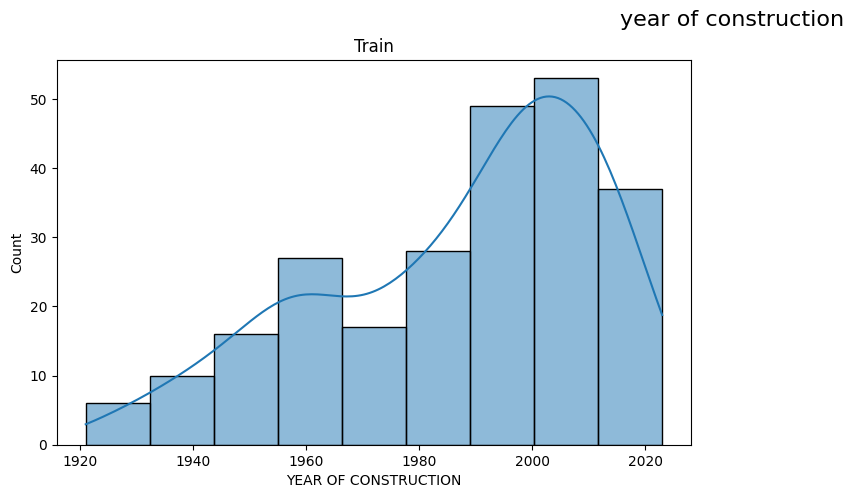

In [ ]:
plt.figure(figsize=[18,5])

plt.suptitle('year of construction', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df_price_usd['YEAR OF CONSTRUCTION'], kde=True)
plt.title('Train')



In [ ]:
df_price_usd["YEAR OF CONSTRUCTION"] = 2023 - df_price_usd["YEAR OF CONSTRUCTION"]


Text(0.5, 1.0, 'Train')

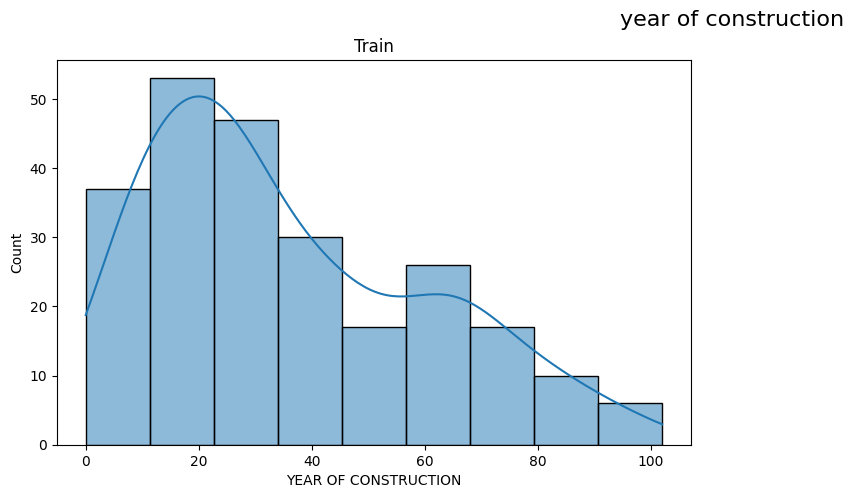

In [ ]:
plt.figure(figsize=[18,5])

plt.suptitle('year of construction', fontsize = 16)

plt.subplot(1,2,1)
sns.histplot(data = df_price_usd['YEAR OF CONSTRUCTION'], kde=True)
plt.title('Train')


In [ ]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', round(mean,3), 'Std:', round(std,3), 'Null:', is_null)

    # Elimizdeki dizinin aritmetik ortalama ve standart sapma değerlerini kullanarak rastgele float veriler üretme
    rand_float = np.random.uniform(mean - std, mean + std, size = is_null)
    print('Numbers:', rand_float[:10])

    # Oluşturduğumuz sayılarla boş değerlerimizi doldurma
    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)

In [ ]:
#film populartydeki sıfır değerleri ortalamalar ile doldur

In [ ]:
#price sutunundaki aykiri degerleri cikar

In [ ]:
#film popularity sutununda neler yapabiliriz?

In [ ]:
#Film turu sutununa   get_dummies yapabiliriz.

Film genre sutununa   get_dummies yapabiliriz.